# Using a Naive Bayes Classifier to look at Amazon Feedback

Author: Nutan Mandale

Mentor: Vincent Ramdhanie

Date: 04/04/2017

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = "./sentimentlabelledsentences/amazon_cells_labelled.txt"
file = pd.read_csv(open(filename), delimiter= '\t', header=None)

In [3]:
file.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


0 and 1 dont make sense so let us rename the column names as message and sentiment.

In the sentiment column we see 0 as negative sentiment and 1 as positive sentiment

In [4]:
file.columns = ['message', 'sentiment']

In [5]:
file.head(3)

,message,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [6]:
#checking for null values in data
print(file.isnull().any())

message      False
sentiment    False
dtype: bool


Now, a message isn't really a feature,but we can engineer features from the message field relatively easily.

In [7]:
keywords = ['good', 'loved', 'great', 'ideal', 'nice', 'Excellent', 'done','charm','best','comfortably','Incredible','pleased']

for key in keywords:
    # we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    file[str(key)] = file.message.str.contains(
        r'(^| )'+ str(key) +'[ .,]',
        case=False
    )

C:\Users\NutanMandale\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [8]:
file['sentiment_new'] = (file['sentiment'] == 1)

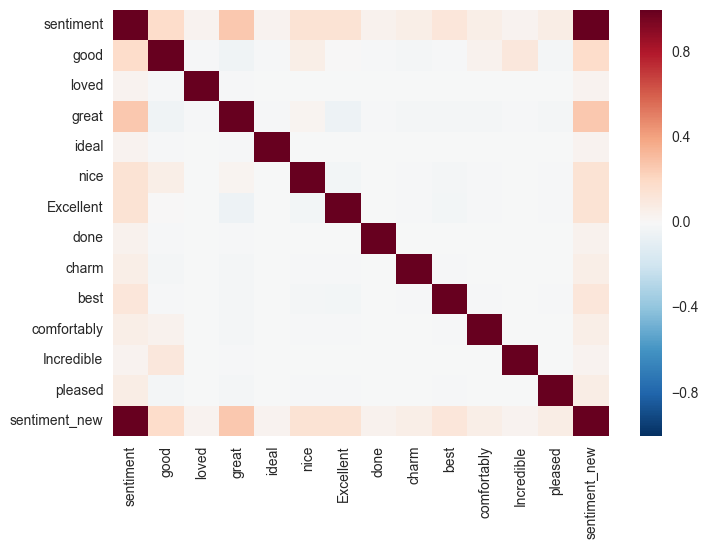

In [9]:
sns.heatmap(file.corr())

In [10]:
data = file[keywords]
target = file['sentiment_new']

In [11]:
# Our data is binary so we will use BernoulliNB
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 313
